In [43]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam
from sklearn.metrics import classification_report

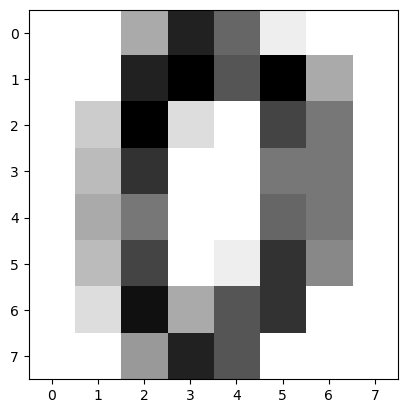

In [4]:
#데이터 확인
digits = datasets.load_digits()
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')

In [41]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [38]:
#데이터 평탄화
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
data.shape

(1797, 64)

In [6]:
#훈련, 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.2)

In [15]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1437, 64), (360, 64), (1437,), (360,))

# 머신러닝

### RF(랜덤 포레스트) 분류

In [8]:
# 모델 선언
rf_clf = RandomForestClassifier(random_state=0)
# 모델 학습
rf_clf.fit(X_train, y_train)
#예측 생성
pred_rf = rf_clf.predict(X_test)
# accuracy 및 confusion matrix 확인
acc_rf = accuracy_score(y_test, pred_rf)
print(f"accuracy: {acc_rf}")
cm_rf = confusion_matrix(y_test, pred_rf)
print(f"confusion matrix:\n{cm_rf}")

accuracy: 0.975
confusion matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 27  0  0  0  0  0  0  0  0]
 [ 0  0 42  0  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  0]
 [ 0  0  0  0 32  0  0  0  0  0]
 [ 0  0  0  0  0 33  0  0  0  0]
 [ 0  0  0  0  0  1 41  0  0  0]
 [ 0  0  0  0  0  0  0 37  0  0]
 [ 0  0  1  1  0  1  0  0 26  0]
 [ 0  0  0  1  0  0  0  1  2 33]]


### LR(로지스틱 회귀) 분류

In [9]:
# 모델 선언
lr_clf = LogisticRegression(random_state=0)
# 모델 학습
lr_clf.fit(X_train, y_train)
#예측 생성
pred_lr = lr_clf.predict(X_test)
# accuracy 및 confusion matrix 확인
acc_lr = accuracy_score(y_test, pred_lr)
print(f"accuracy: {acc_lr}")
cm_lr = confusion_matrix(y_test, pred_lr)
print(f"confusion matrix:\n{cm_lr}")

accuracy: 0.9666666666666667
confusion matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 27  0  0  0  0  0  0  0  0]
 [ 0  0 42  0  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  0]
 [ 0  0  0  0 32  0  0  0  0  0]
 [ 0  1  0  0  0 32  0  0  0  0]
 [ 0  0  0  0  0  1 41  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  1]
 [ 0  2  0  0  0  0  0  0 27  0]
 [ 1  0  0  2  0  0  0  0  3 31]]


C:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### KNN(K 최근접 이웃) 분류

In [10]:
#모델 선언
knn_clf = KNeighborsClassifier(n_neighbors=3)
# 모델 학습
knn_clf.fit(X_train, y_train)
#예측 생성
pred_knn = knn_clf.predict(X_test)
# accuracy 및 confusion matrix 확인
acc_knn = accuracy_score(y_test, pred_knn)
print(f"accuracy: {acc_knn}")
cm_knn = confusion_matrix(y_test, pred_knn)
print(f"confusion matrix:\n{cm_knn}")

accuracy: 0.9861111111111112
confusion matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 27  0  0  0  0  0  0  0  0]
 [ 0  0 42  0  0  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0  0  0]
 [ 0  0  0  0 32  0  0  0  0  0]
 [ 0  0  0  0  0 32  0  0  0  1]
 [ 0  0  0  0  0  0 42  0  0  0]
 [ 0  0  0  0  0  0  0 37  0  0]
 [ 0  1  0  1  0  0  0  0 27  0]
 [ 0  0  0  0  1  0  0  0  1 35]]


### SVM(서포트 벡터 머신) 분류

In [11]:
# 모델 선언
svm_clf = SVC(random_state=0)
# 모델 학습
svm_clf.fit(X_train, y_train)
#예측 생성
pred_svm = svm_clf.predict(X_test)
# accuracy 및 confusion matrix 확인
acc_svm = accuracy_score(y_test, pred_svm)
print(f"accuracy: {acc_svm}")
cm_svm = confusion_matrix(y_test, pred_svm)
print(f"confusion matrix:\n{cm_svm}")

accuracy: 0.9888888888888889
confusion matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 27  0  0  0  0  0  0  0  0]
 [ 0  0 42  0  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  0]
 [ 0  0  0  0 32  0  0  0  0  0]
 [ 0  0  0  0  0 33  0  0  0  0]
 [ 0  0  0  0  0  0 42  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  1]
 [ 0  1  0  0  0  0  0  0 28  0]
 [ 0  0  0  0  0  0  0  1  0 36]]


# 딥러닝

In [20]:
#데이터 인코딩
y_1hot = pd.get_dummies(digits.target).values

In [33]:
y_1hot[:5]

array([[ True, False, False, False, False, False, False, False, False,
        False],
       [False,  True, False, False, False, False, False, False, False,
        False],
       [False, False,  True, False, False, False, False, False, False,
        False],
       [False, False, False,  True, False, False, False, False, False,
        False],
       [False, False, False, False,  True, False, False, False, False,
        False]])

In [42]:
#테스트, 트레인 분리
X_train, X_test, y_train, y_test = train_test_split(data, y_1hot, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1437, 64), (360, 64), (1437, 10), (360, 10))

In [34]:
model = Sequential()

model.add(Dense(20,input_shape=(64,),activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()

C:\Users\송이두\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 20)                  │           1,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 30)                  │             630 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 30)                  │             930 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 30)                  │             930 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │             310 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,100 (16.02 KB)

 Trainable params: 4,100 (16.02 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=30,validation_split=0.2)
y_pred = model.predict(X_test)

Epoch 1/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 1.0000 - loss: 0.0071 - val_accuracy: 0.9653 - val_loss: 0.1381
Epoch 2/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0083 - val_accuracy: 0.9688 - val_loss: 0.1366
Epoch 3/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0067 - val_accuracy: 0.9688 - val_loss: 0.1495
Epoch 4/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0056 - val_accuracy: 0.9514 - val_loss: 0.1483
Epoch 5/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0048 - val_accuracy: 0.9688 - val_loss: 0.1447
Epoch 6/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0039 - val_accuracy: 0.9688 - val_loss: 0.1378
Epoch 7/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0032 - val_accuracy: 0.9688 - val_loss: 0.1410
Epoch 8/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0036 - val_accuracy: 0.9653 - val_loss

In [40]:
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        47
           1       0.98      0.95      0.96        43
           2       0.97      0.89      0.93        37
           3       0.91      0.97      0.94        33
           4       1.00      0.97      0.98        31
           5       0.92      1.00      0.96        35
           6       0.97      0.97      0.97        32
           7       0.93      0.97      0.95        39
           8       0.94      0.94      0.94        35
           9       0.96      0.93      0.95        28

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360

[[45  0  0  0  0  1  0  0  0  1]
 [ 0 41  0  0  0  1  1  0  0  0]
 [ 0  1 33  1  0  0  0  1  1  0]
 [ 0  0  0 32  0  0  0  1  0  0]
 [ 0  0  0  0 30  0  0  1  0  0]
 [ 0  0  0  0  0 35  0  0  0  0]
 [ 1  0  0  0  0  0 31  0  0  0]
 [ 0  0  0